In [ ]:
import pandas as pd

In [ ]:
df = pd.concat(map(pd.read_csv, ['AIS_2022_01_01.csv', 'AIS_2022_01_02.csv']))

In [ ]:
df.shape

(13884609, 17)

In [ ]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,368084090,2022-01-01T00:00:00,29.93174,-89.99243,6.0,296.2,299.0,LARRY B WHIPPLE,NaN,WDK7401,57.0,12.0,23.0,10.0,3.0,57.0,A
1,368140160,2022-01-01T00:00:00,30.33475,-87.14429,0.0,312.0,87.0,TWISTED ANGEL,IMO0000000,WDL5339,36.0,NaN,12.0,7.0,NaN,NaN,B
2,366941830,2022-01-01T00:00:02,29.30919,-94.79702,0.0,180.2,511.0,SAN PATRICIO,NaN,WCX6675,31.0,5.0,18.0,7.0,NaN,57.0,A
3,316005971,2022-01-01T00:00:06,46.50268,-84.35674,2.4,258.6,257.0,BEVERLY M I,IMO9084047,CFP2004,31.0,0.0,34.0,10.0,5.3,99.0,A
4,316004054,2022-01-01T00:00:07,46.50326,-84.37506,0.3,61.9,511.0,ADANAC III,IMO8745333,VCLT,31.0,0.0,24.0,5.0,3.0,50.0,A


In [ ]:
df = df.loc[(df['MMSI'] >= 20), ["MMSI","BaseDateTime","LAT","LON","SOG","COG","VesselName","VesselType"]]

In [ ]:
df.shape

(13884054, 8)

In [ ]:
df_80 = df[df.VesselType == 80]

In [ ]:
df_80.shape

(559147, 8)

In [ ]:
df_80 = df_80.dropna()

In [ ]:
df_80.shape

(559147, 8)

In [ ]:
df_80 = df_80.drop_duplicates()

In [ ]:
df_80.shape

(559115, 8)

In [ ]:
df_80 = df_80.reset_index(drop=True)

In [ ]:
df_80.shape

(559115, 8)

In [ ]:
df_80.isnull().sum()

MMSI            0
BaseDateTime    0
LAT             0
LON             0
SOG             0
COG             0
VesselName      0
VesselType      0
dtype: int64

In [ ]:
df_80['LAT'].min()

10.24173

In [ ]:
df_80['LAT'].max()

49.32398

In [ ]:
df_80['LON'].max()

146.67427

In [ ]:
df_80['LON'].min()

-159.27445

In [ ]:
df_80['MMSI'].value_counts()

338227000    2600
636016093    2503
367403140    2495
316014160    2488
367067110    2483
             ... 
563624000       1
636011454       1
636016005       1
566915000       1
311476000       1
Name: MMSI, Length: 658, dtype: int64

<AxesSubplot:>

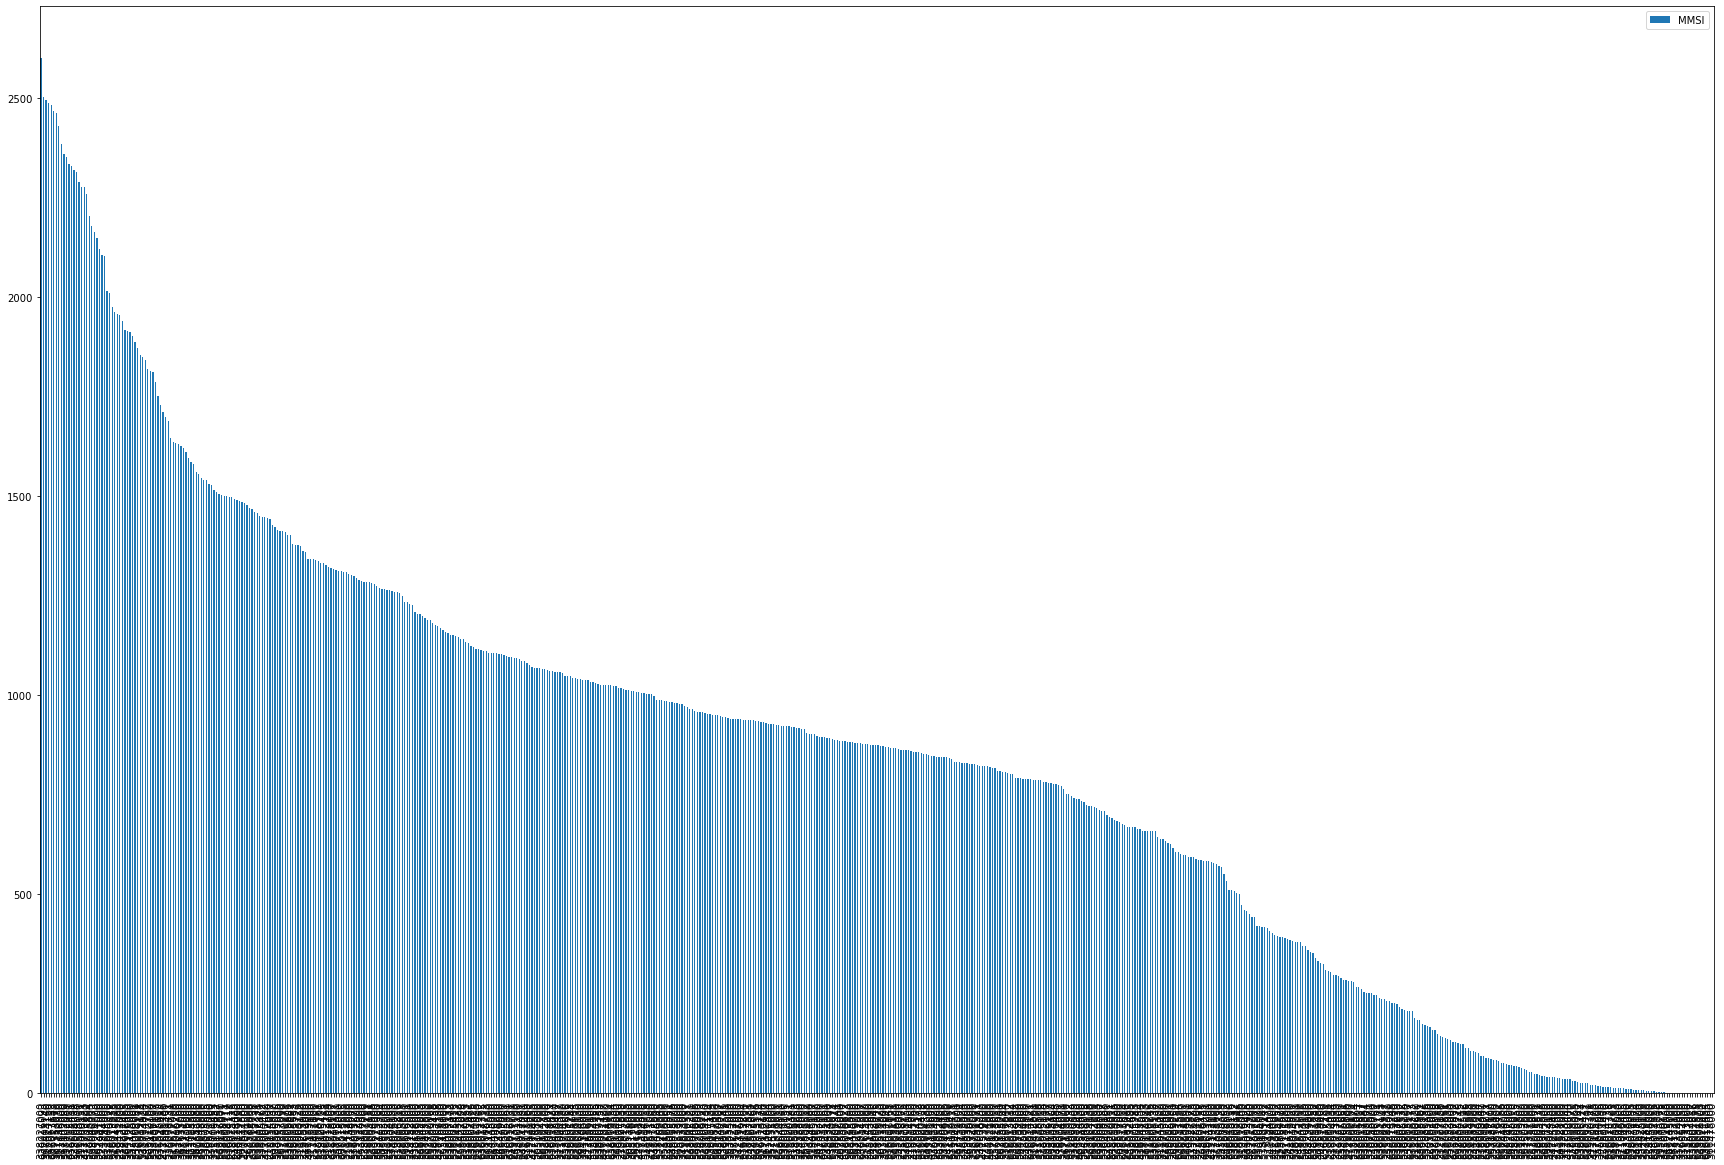

In [ ]:
pd.DataFrame(df_80['MMSI'].value_counts()).plot(kind='bar', figsize=(30,20))

In [ ]:
df_80_1 = df_80[df_80['MMSI'] == 338227000]

In [ ]:
df_80_1.shape

(2600, 8)

In [ ]:
df_80_1['LAT'].min()

33.62938

In [ ]:
df_80_1['LON'].min()

-125.49317

In [ ]:
df_80_1['LAT'].max()

40.00557

In [ ]:
df_80_1['LON'].max()

-118.18469

In [ ]:
df_80_1_lola = df = df_80_1.loc[(df_80_1['MMSI'] >= 20), ["BaseDateTime","LAT","LON"]]
df_80_1_lola.shape

(2600, 3)

In [ ]:
df_80_1_lola.head()

,BaseDateTime,LAT,LON
217,2022-01-01T00:00:09,33.77469,-118.21549
874,2022-01-01T00:03:04,33.77469,-118.21549
1198,2022-01-01T00:06:04,33.77470,-118.21548
2529,2022-01-01T00:09:07,33.77471,-118.21547
2754,2022-01-01T00:15:08,33.77465,-118.21547


In [ ]:
df_80_1_lola = df_80_1_lola.reset_index(drop=True)
df_80_1_lola.head()

,BaseDateTime,LAT,LON
0,2022-01-01T00:00:09,33.77469,-118.21549
1,2022-01-01T00:03:04,33.77469,-118.21549
2,2022-01-01T00:06:04,33.77470,-118.21548
3,2022-01-01T00:09:07,33.77471,-118.21547
4,2022-01-01T00:15:08,33.77465,-118.21547


In [ ]:
df_80_1_lola[['Date', 'Time']] = df_80_1_lola['BaseDateTime'].str.split('T', expand=True)
df_80_1_lola = df_80_1_lola.drop(['BaseDateTime'], axis=1)
df_80_1_lola.head()

,LAT,LON,Date,Time
0,33.77469,-118.21549,2022-01-01,00:00:09
1,33.77469,-118.21549,2022-01-01,00:03:04
2,33.77470,-118.21548,2022-01-01,00:06:04
3,33.77471,-118.21547,2022-01-01,00:09:07
4,33.77465,-118.21547,2022-01-01,00:15:08


In [ ]:
df_80_1_lola.to_csv('df_80_1_lola.csv')

In [ ]:
df_80_1_lola.head(-20)

,LAT,LON,Date,Time
0,33.77469,-118.21549,2022-01-01,00:00:09
1,33.77469,-118.21549,2022-01-01,00:03:04
2,33.77470,-118.21548,2022-01-01,00:06:04
3,33.77471,-118.21547,2022-01-01,00:09:07
4,33.77465,-118.21547,2022-01-01,00:15:08
...,...,...,...,...
2575,39.27698,-125.31910,2022-01-02,20:56:51
2576,39.29049,-125.32236,2022-01-02,21:00:08
2577,39.32883,-125.33071,2022-01-02,21:09:21
2578,39.36167,-125.33752,2022-01-02,21:17:15


In [ ]:
df_80_1_lola_p1 = df_80_1_lola[df_80_1_lola['Date'] == '2022-01-01']
df_80_1_lola_p1.head(-5)

,LAT,LON,Date,Time
0,33.77469,-118.21549,2022-01-01,00:00:09
1,33.77469,-118.21549,2022-01-01,00:03:04
2,33.77470,-118.21548,2022-01-01,00:06:04
3,33.77471,-118.21547,2022-01-01,00:09:07
4,33.77465,-118.21547,2022-01-01,00:15:08
...,...,...,...,...
1268,34.67498,-122.32642,2022-01-01,22:09:53
1269,34.75556,-122.39711,2022-01-01,22:37:44
1270,34.79140,-122.42744,2022-01-01,22:49:54
1271,34.82731,-122.45910,2022-01-01,23:02:24


In [ ]:
df_80_1_lola_p1.shape

(1278, 4)

In [ ]:
df_80_1_lola_p1 = df_80_1_lola_p1.sort_values(by="Time")

In [ ]:
df_80_1_lola_p2 = df_80_1_lola[df_80_1_lola['Date'] == '2022-01-02']
df_80_1_lola_p2 = df_80_1_lola_p1.sort_values(by="Time")
df_80_1_lola_p2.head(10)

,LAT,LON,Date,Time
0,33.77469,-118.21549,2022-01-01,00:00:09
1,33.77469,-118.21549,2022-01-01,00:03:04
2,33.77470,-118.21548,2022-01-01,00:06:04
3,33.77471,-118.21547,2022-01-01,00:09:07
5,33.77470,-118.21546,2022-01-01,00:12:06
4,33.77465,-118.21547,2022-01-01,00:15:08
6,33.77468,-118.21547,2022-01-01,00:18:06
7,33.77467,-118.21546,2022-01-01,00:21:07
8,33.77468,-118.21544,2022-01-01,00:24:06
10,33.77474,-118.21543,2022-01-01,00:27:06


In [ ]:
df_80_1_lola = pd.concat([df_80_1_lola_p1, df_80_1_lola_p2])
df_80_1_lola.head(10)

,LAT,LON,Date,Time
0,33.77469,-118.21549,2022-01-01,00:00:09
1,33.77469,-118.21549,2022-01-01,00:03:04
2,33.77470,-118.21548,2022-01-01,00:06:04
3,33.77471,-118.21547,2022-01-01,00:09:07
5,33.77470,-118.21546,2022-01-01,00:12:06
4,33.77465,-118.21547,2022-01-01,00:15:08
6,33.77468,-118.21547,2022-01-01,00:18:06
7,33.77467,-118.21546,2022-01-01,00:21:07
8,33.77468,-118.21544,2022-01-01,00:24:06
10,33.77474,-118.21543,2022-01-01,00:27:06


In [ ]:
df_80_1_lola.head(-10)

,LAT,LON,Date,Time
0,33.77469,-118.21549,2022-01-01,00:00:09
1,33.77469,-118.21549,2022-01-01,00:03:04
2,33.77470,-118.21548,2022-01-01,00:06:04
3,33.77471,-118.21547,2022-01-01,00:09:07
5,33.77470,-118.21546,2022-01-01,00:12:06
...,...,...,...,...
1172,34.94604,-122.56482,2022-01-01,23:43:52
1160,34.94902,-122.56754,2022-01-01,23:44:54
1181,34.95239,-122.57060,2022-01-01,23:46:04
1166,34.95537,-122.57325,2022-01-01,23:47:05


In [ ]:
df_80_1_lola.shape

(2556, 4)

In [ ]:
df_80_1_lola_p1.shape

(1278, 4)

In [ ]:
df_80_1_lola_p2.shape

(1278, 4)

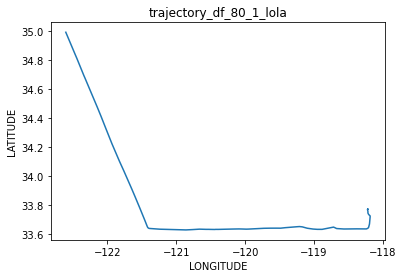

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_80_1_lola_p1.LON, df_80_1_lola_p1.LAT)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.title('trajectory_df_80_1_lola')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
cols = list(df_80_1_lola_p1)[:2]
cols

['LAT', 'LON']

In [ ]:
df_for_training = df_80_1_lola_p1[cols].astype(float)

In [ ]:
df_for_training.shape

(1278, 2)

In [ ]:
train_df=df_for_training[:-900]
test_df=df_for_training[-900:]

In [ ]:
test_df.head()

,LAT,LON
877,33.64751,-119.36171
881,33.64731,-119.36644
352,33.64708,-119.37135
885,33.64684,-119.37621
377,33.64661,-119.38120


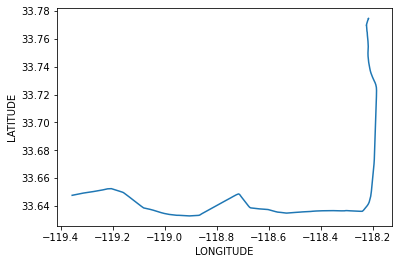

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_df.LON, train_df.LAT)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

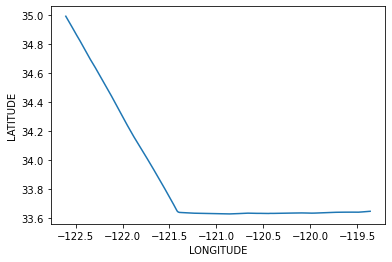

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_df.LON, test_df.LAT)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

In [ ]:
model = VAR(train_df.diff()[1:])
var_model = VARMAX(train_df, order=(4,0), enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:         ['LAT', 'LON']   No. Observations:                  378
Model:                         VAR(4)   Log Likelihood                 446.256
                          + intercept   AIC                           -850.513
Date:                Thu, 26 Jan 2023   BIC                           -767.880
Time:                        17:23:00   HQIC                          -817.717
Sample:                             0                                         
                                - 378                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):         377.00, 375.89   Jarque-Bera (JB):         87.46, 36.55
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.17, 2.25   Skew:                      1.15, -0.62
Prob(H) (two-sided):            0.00,

In [ ]:
n_forecast = 900
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)
predictions=predict.predicted_mean

In [ ]:
predictions.columns=['LAT_predicted','LON_predicted']
predictions

,LAT_predicted,LON_predicted
378,33.674674,-118.603793
379,33.674010,-118.603904
380,33.673336,-118.604113
381,33.672653,-118.604421
382,33.671961,-118.604830
...,...,...
1273,33.671982,-118.604823
1274,33.671982,-118.604823
1275,33.671982,-118.604823
1276,33.671982,-118.604823


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

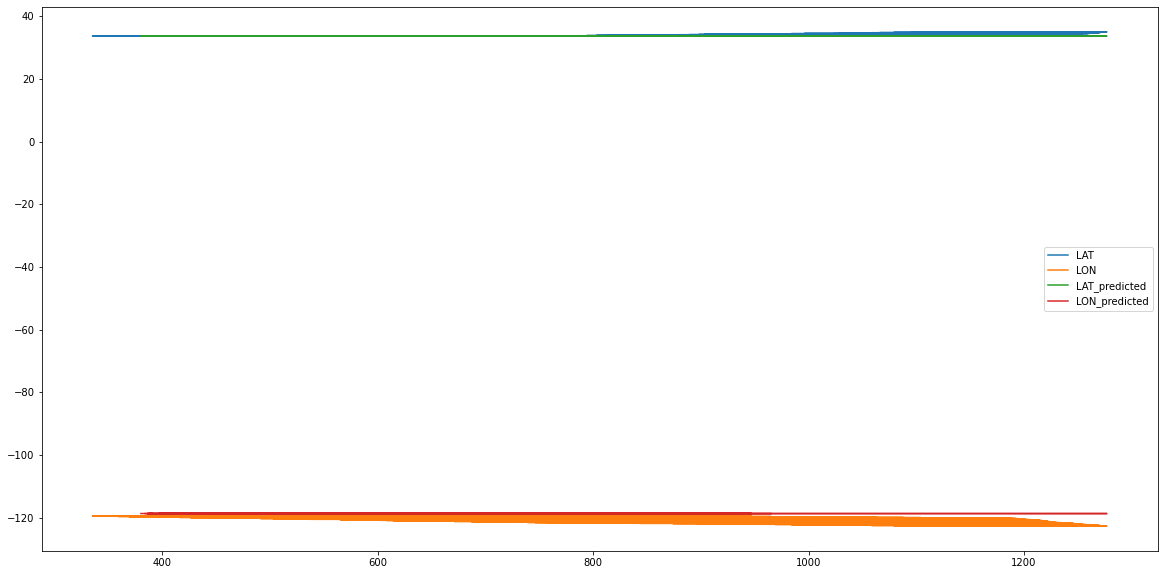

In [ ]:
test_vs_pred.plot(figsize=(20,10))

In [ ]:
test_vs_pred.columns

Index(['LAT', 'LON', 'LAT_predicted', 'LON_predicted'], dtype='object')

In [ ]:
test_vs_pred.columns

Index(['LAT', 'LON', 'LAT_predicted', 'LON_predicted'], dtype='object')

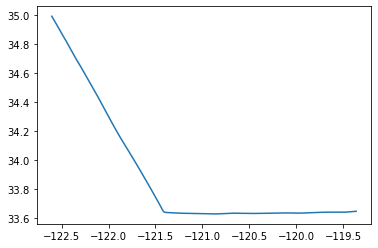

In [ ]:
plt.plot(test_vs_pred.LON,test_vs_pred.LAT)

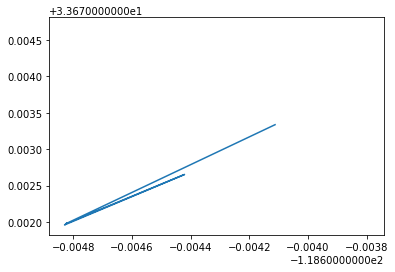

In [ ]:
plt.plot(test_vs_pred.LON_predicted,test_vs_pred.LAT_predicted)